In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from PIL import Image

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img

In [2]:
# path = "/Users/haitham/Desktop/95454847_518658062160227_7455233713052319744_o.jpg"
path = "/Users/haitham/Desktop/95561786_518658108826889_5403235868171304960_o.jpg"
# path = "/Users/haitham/Desktop/Aspetar.jpg"

In [3]:
def conv_step(m_x_slice, m_filter):
    
    r = np.multiply(m_x_slice, m_filter)
    r = np.sum(r)
    return r

In [4]:

def forward_conv(x, filtr, stride=1):

    f_h = filtr.shape[1]
    x_h = x.shape[1]
    
    f_v = filtr.shape[0]
    x_v = x.shape[0]

    f_c = filtr.shape[2]
    x_c = x.shape[2]

    n_conv_h = np.floor(np.divide((x_h - f_h),stride)+1).astype("int")
    n_conv_v = np.floor(np.divide((x_v - f_v),stride)+1).astype("int")

    conv = np.zeros((int(n_conv_v), int(n_conv_h)))

    for v in range(n_conv_v):
        for h in range(n_conv_h):

            v_index = v * stride
            h_index = h * stride
            x_slice = x[ v_index : v_index+f_v , h_index : h_index+f_h, :]

            conv[v,h] =conv_step( x_slice, filtr )
    return conv

In [5]:
filtr_hor = np.array([[1, 1, 1],[0, 0, 0],[-1,-1,-1]])

filtr_ver = filtr_hor.T

f_tilt = np.array([[9, 3, 0],[3, 0, -3],[0,-3,-9]])



filtr_ver = np.repeat(filtr_ver[:,:,np.newaxis], 3, axis=-1)

filtr_hor = np.repeat(filtr_hor[:,:, np.newaxis], 3, axis=-1)

f_tilt = np.repeat(f_tilt[:,:, np.newaxis],3,-1)

(512, 512, 3)

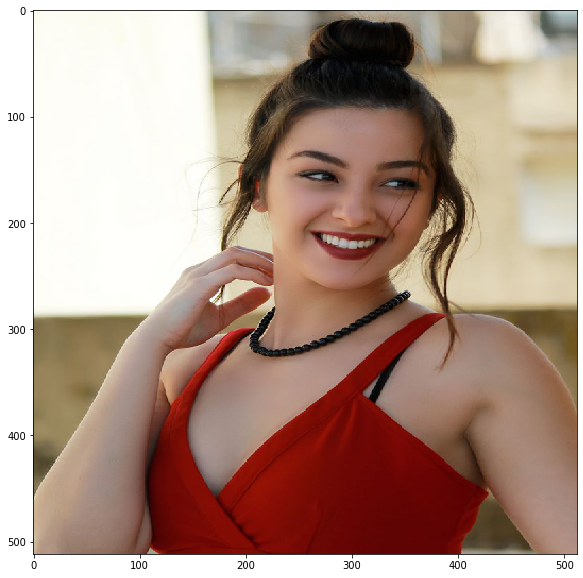

In [14]:
img = tf.keras.preprocessing.image.load_img(
    path, grayscale=False, color_mode='rgb', target_size=(512,512,3),
    interpolation='nearest')


img_arry = img_to_array(img)

plt.figure(figsize=(10,10))
plt.imshow(img)
img_arry.shape

(510, 510)

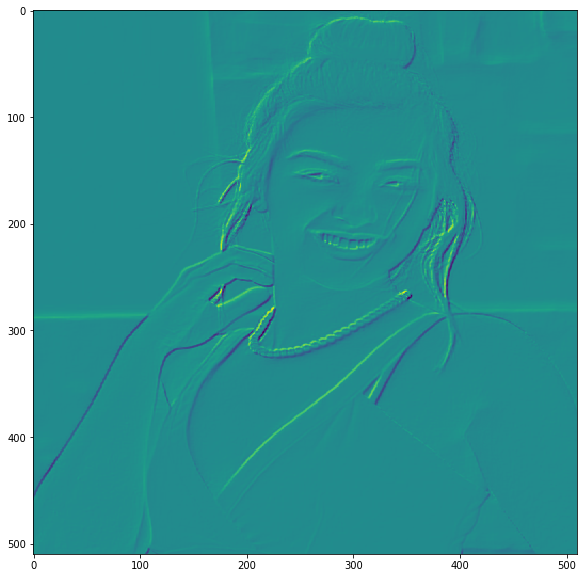

In [30]:
img_conv_tilt = forward_conv(img_arry, f_tilt,1)

plt.figure(figsize=(10,10))
plt.imshow(img_conv_tilt)
img_conv_tilt.shape

(510, 510)

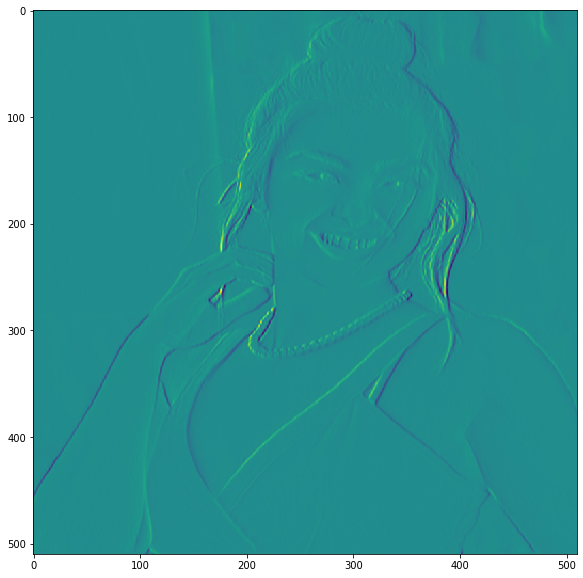

In [13]:
img_conv_ver = forward_conv(img_arry, filtr_ver,1)

plt.figure(figsize=(10,10))
plt.imshow(img_conv_ver)
img_conv_ver.shape

(510, 510)

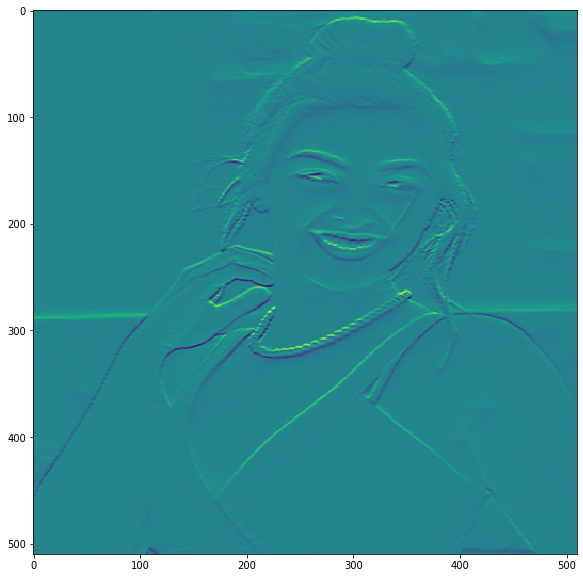

In [12]:
img_conv_hor = forward_conv(img_arry, filtr_hor,1)

plt.figure(figsize=(10,10))
plt.imshow(img_conv_hor)
img_conv_hor.shape